## CMPINF 2100 Week 02
### Simulating the Average
## Overview

We have used programming techniques to calc the avg of randomly generated sequences of numbers.

We introduced the idea of WHICH AVERAGE is correct????

But lets now dive deeper into this important question!

## Import modules

We have used the `random` module to generate random numbers using the `random.random()` function.

But what exactly is the `random.random()` function doing???

In [1]:
import random

We are going to also use `matplotlib.pyplot` to VISUALIZE the random numbers. This module has a REALLY long name. So instead of importing as it is..let's use an ALIAS!!!

In [2]:
import matplotlib.pyplot as plt

In [3]:
%whos

Variable   Type      Data/Info
------------------------------
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
random     module    <module 'random' from '/A<...>lib/python3.8/random.py'>


## Uniform random numbers

The `random.random()` function generates random numbers UNIFORMLY between 0 and 1. But what does a UNIFORM DISTRIBUTION look like?

In [4]:
random.seed(2100)

xu_1000 = [random.random() for _ in range(1000)]

In [5]:
type(xu_1000)

list

In [6]:
len(xu_1000)

1000

In [7]:
xu_1000[:5]

[0.764021138054951,
 0.4692037101382426,
 0.09010549233469012,
 0.08980190601697957,
 0.5561956463771123]

Visualize the DISTRIBUTION using a HISTOGRAM!!! For now, a quick intro on a histogram is the HEIGHT of the VERTICAL BARS denote the COUNTS of obs in a small interval. 

The TALLER the bar, the more obs are located within that interval. Histograms allow us to SEE where obs are CONCENTRATED vs where they are NOT concentrated!!!

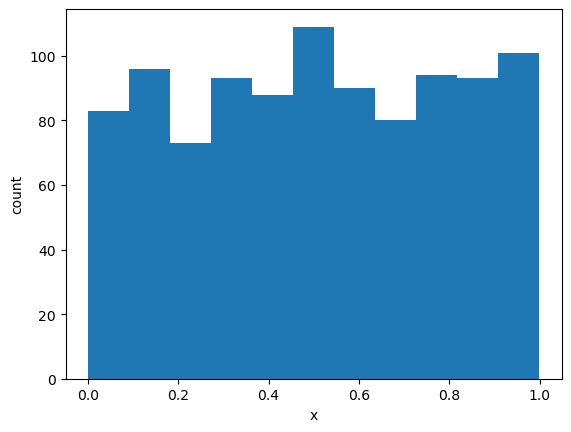

In [8]:
plt.hist(xu_1000, bins=11)
plt.xlabel('x')
plt.ylabel('count')

plt.show()

What if we generate 100000 random numbers instead of just 1000 random numbers?

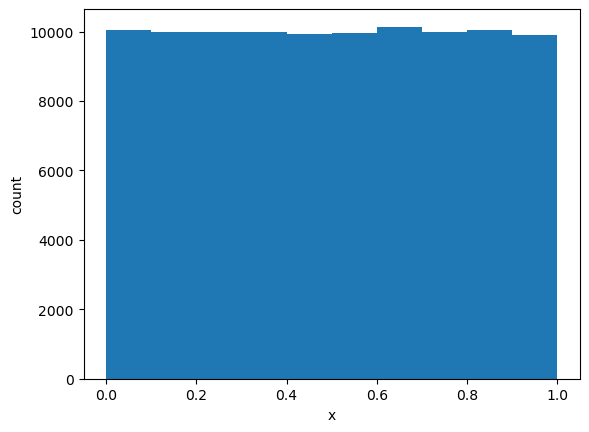

In [9]:
plt.hist([random.random() for _ in range(100000)])
plt.xlabel('x')
plt.ylabel('count')

plt.show()

Average = Expected Value

We expect to see them in the middle. You have an equal change of getting any of these values.

In [10]:
def my_avg(x):
    return sum(x)/len(x)

In [11]:
my_avg([random.random() for _ in range(100000)])

0.4997182669368152

In [12]:
random.seed(2100)

my_avg([random.random() for _ in range(100000)])

0.4997422726343657

In [13]:
random.seed(2100)

my_avg([random.random() for _ in range(1000000)])

0.4997825950409591

In [14]:
random.seed(2100)

round(my_avg([random.random() for _ in range(1000000)]), 4)

0.4998

Instead of using 1 million obs, what if we could only collect 5 samples????

In [15]:
random.seed(2100)

print(my_avg([random.random() for _ in range(5)]))

print(my_avg([random.random() for _ in range(5)]))

print(my_avg([random.random() for _ in range(5)]))

0.3938655785843951
0.5587010971306385
0.5951333231565


Which of these 3 averages are CORRECT???

In [16]:
random.seed(2100)

print(sum([random.random() for _ in range(5)]))

print(sum([random.random() for _ in range(5)]))

1.9693278929219755
2.793505485653193


We have three different collections of 5 random numbers!!

The SAMPLE avg will therefore be different!!!

We are calc an ESTIMATE of the AVG based on FINITE sample size!!!

The real question we should be asking if HOW CONFIDENT we are in that estimate!!!

OR...what is the VARIABILITY of the estimate of the average?!?!?!?!?!

## Simulate the variability of the avg

Let's use our programming techniques from this week to study the variation of the sample average!

Two major steps to study the variability of the average:
* Generate a sequence of random numbers from an ASSUMED distribution
* Calc the avg given that sequence

In [17]:
def gen_samples_calc_avg(N):
    """
    Assume we are generating values from a UNIFORM distribution between 0 and 1
    """
    return my_avg([random.random() for _ in range(N)])

In [18]:
random.seed(2100)

gen_samples_calc_avg(5)

0.3938655785843951

In [19]:
random.seed(2100)

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

0.3938655785843951
0.5587010971306385
0.5951333231565


In [20]:
random.seed(2100)

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

print(gen_samples_calc_avg(5))

0.3938655785843951
0.5587010971306385
0.5951333231565
0.5048822650128671
0.5505699823868078
0.6109906176437405
0.5327641794141614
0.27536713011085057
0.5458884102553585


Let's replicate calc the average from 5 random numbers...1000 times

In [21]:
random.seed(2100)

xbar_sim_N05_R1000 = [ gen_samples_calc_avg(5) for _ in range(1000) ]

In [22]:
xbar_sim_N05_R1000[:9]

[0.3938655785843951,
 0.5587010971306385,
 0.5951333231565,
 0.5048822650128671,
 0.5505699823868078,
 0.6109906176437405,
 0.5327641794141614,
 0.27536713011085057,
 0.5458884102553585]

The `xbar_sim_N05_R1000` is a list of a list of SAMPLE avgs!!! 

Let's visualize the DISTRIBUTION of the sample avgs using a HISTOGRAM!!

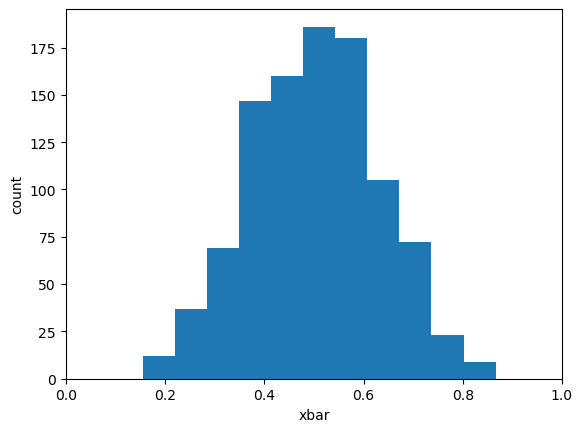

In [23]:
plt.hist(xbar_sim_N05_R1000, bins=11)
plt.xlabel('xbar')
plt.ylabel('count')
plt.xlim(0,1)

plt.show()

^ BELL CURVE: Common values in middle and not common are on the sides

In [24]:
my_avg(xbar_sim_N05_R1000)

0.502647095657702

Let's repeat the process but this time use MORE REPLICATIONS!!

Let's replicate 10000 times!!!!

In [25]:
random.seed(2100)

xbar_sim_N05_R10000 = [ gen_samples_calc_avg(5) for _ in range(10000) ]

In [26]:
my_avg(xbar_sim_N05_R10000)

0.4991771248488468

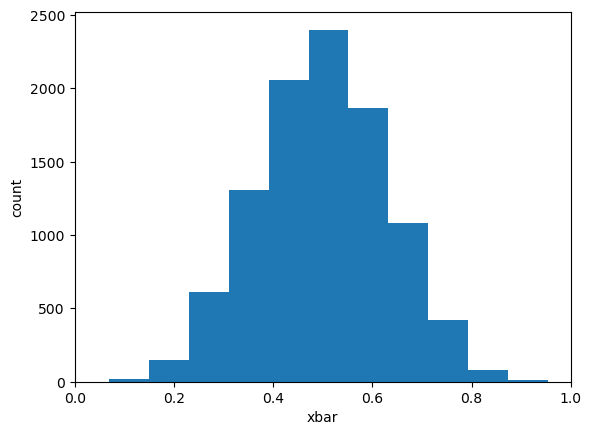

In [27]:
plt.hist(xbar_sim_N05_R10000, bins=11)
plt.xlabel('xbar')
plt.ylabel('count')
plt.xlim(0,1)

plt.show()

What if we replicated a SMALL number of times?!!!

What if we replicaed calc avg of 5 numbers...just 11 times???

In [28]:
random.seed(2100)

xbar_sim_N05_R11 = [ gen_samples_calc_avg(5) for _ in range(11) ]

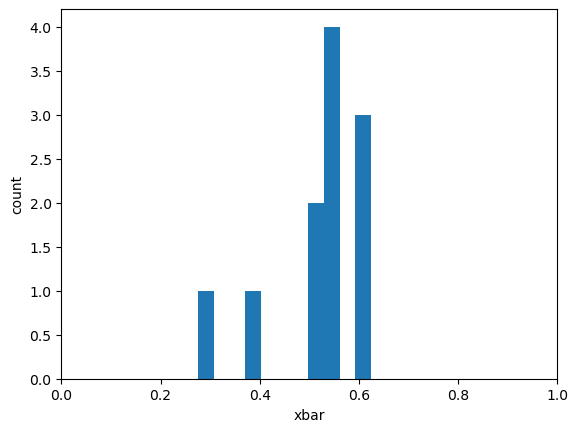

In [29]:
plt.hist(xbar_sim_N05_R11, bins=11)
plt.xlabel('xbar')
plt.ylabel('count')
plt.xlim(0,1)

plt.show()

Let's study the DISTRIBUTION of the AVG based on NUMBER OF REPLICATIONS!!!

In [30]:
num_replication = [ 5 * (2 ** ix) for ix in range(12)]

In [31]:
num_replication

[5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]

We need to use a function to support our iteration efforst. We know how to use a for-loo, but the `enumerate()` function provides EXTRA capabilites for a for-loop.

In [32]:


for index_in_sequence, value_in_sequence in enumerate(num_replication):
    print((index_in_sequence, value_in_sequence))

(0, 5)
(1, 10)
(2, 20)
(3, 40)
(4, 80)
(5, 160)
(6, 320)
(7, 640)
(8, 1280)
(9, 2560)
(10, 5120)
(11, 10240)


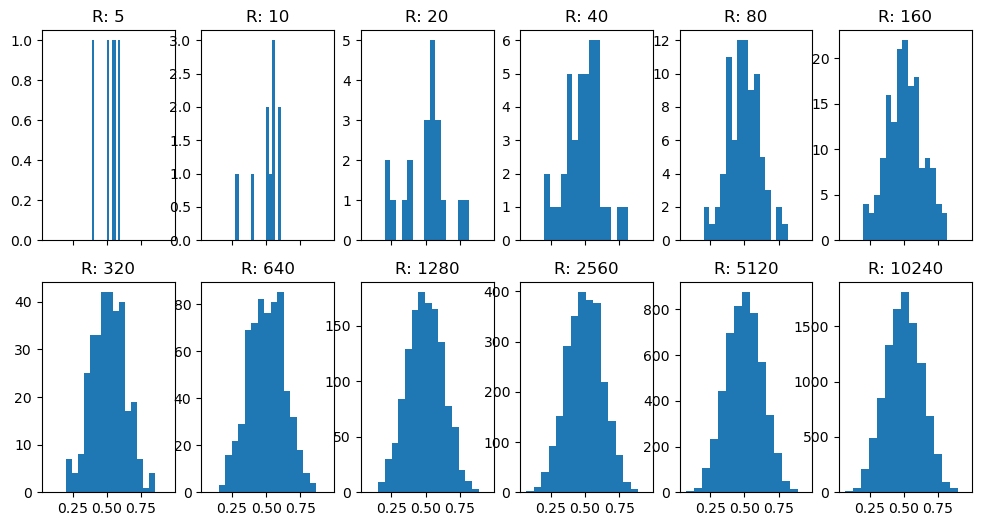

In [33]:
fix, axs = plt.subplots(2, 6, figsize=(12,6), sharex=True, sharey=False)

axs = axs.ravel()

for i, nr in enumerate(num_replication):
    random.seed(2100)
    axs[i].hist([gen_samples_calc_avg(5) for _ in range(nr)], density=False, bins=15)
    axs[i].set_title('R: %d' % (nr))

The distribution of the AVG is CONVERGING to a BELL CURVE!!

A Bell Curve is the common name of the Gaussian or NORMAL DISTRIBUTION!!!

The distribution of the avg is converging to a NORMAL DISTRIBUTION!!!

This is the CENTRAL LIMIT THEOREM (CLT)!!!!
* This says that a distribution of a summary statistic if we replicate calc that summary statistic thousands upon thousands of times will turn into a Gaussian

## Why does this matter?

The CLT tells us that the AVG is distributed NORMALLY! We can therefore express the variability of the AVG using a statistic that represents the WIDTH of the bell curve!!!

The VARIANCE is the statistic that describes VARIATION or VARIABILITY!!!

$$ s^2 = \frac{1}{N-1} \sum_{n=1}^{N} \left( \left(x_n - \bar{x}\right)^2 \right) $$

Break down formula for SAMPLE VARIANCE into 6 main steps:
* Calc sample avg
* Calc DEVIATION (diff) of each measurement from the AVG
* Square deviation
* Sum the squared deviation across all measurements
* Divide the SUM of the squared deviation by the length minus 1

The VARIANCE is the MEAN squared deviation from the AVERAGE!!!

In [34]:
def my_variance(x):
    xbar = my_avg(x)
    squared_deviation = [ (xn - xbar)**2 for xn in x]
    return sum(squared_deviation) / (len(x) - 1)

In [36]:
print(my_variance([1,2,3]))

1.0


In [38]:
print(my_variance([5,10,15]))

25.0


What is the VARIANCE of the average?

In [39]:
my_variance(xbar_sim_N05_R10000)

0.016879961620988607

The standard deviation is the (half) width of the bell curve.

The standard deviation is the SQUARE ROOT of the variance.

Or, the variance is the standard deviation SQUARED!!!

In [40]:
def my_sd(x):
    return my_variance(x)**0.5

In [41]:
my_sd(xbar_sim_N05_R10000)

0.12992290645220575

## How can we use this???

We now know that REPLICATING calc many, many, many times produces a NORMAL DISTRIBUTION!!!

We now know that we can express variability of the avg using standard deviation!!!

Let's now study the variability based on DIFFERENT sample sizes!!!

In [42]:
sample_size_study = [ 3 * (2 ** ix) for ix in range(15)]

In [43]:
sample_size_study

[3, 6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288, 24576, 49152]

Let's replicate 2500 times calc the avg from a sample size to ensure we roughly have a NORMAL DISTRIBUTION for the SAMPLE AVERAGE!!!

We need a NESTED LIST COMPREHENSION to execute our simulation!!!

The OUTER list comprehension iterates over SAMPLE SIZE.

The INNER list comprehension iterates over the REPLICATIONS.

In [47]:
random.seed(2100)

study_sd_vs_samplesize = [ my_sd([gen_samples_calc_avg(n) for _ in range(2500)]) for n in sample_size_study  ]

In [48]:
type(study_sd_vs_samplesize)

list

In [49]:
len(study_sd_vs_samplesize)

15

Show the sd of the avg with respect to the sample size!!!

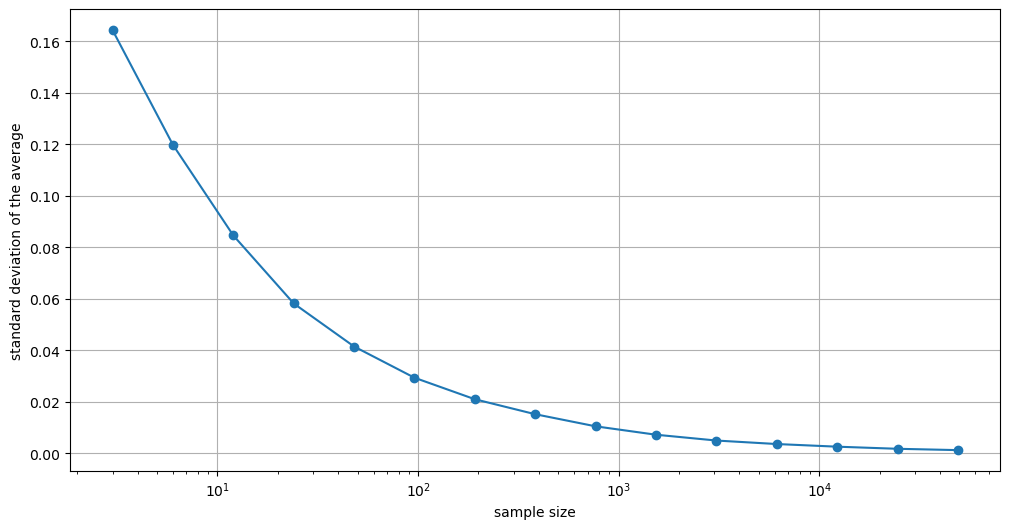

In [51]:
fix, ax = plt.subplots(figsize=(12,6))

ax.plot(sample_size_study, study_sd_vs_samplesize, '-o')
ax.set_xscale('log')
ax.set_xlabel('sample size')
ax.set_ylabel('standard deviation of the average')
ax.grid(True)

plt.show()

The SD on the avg is INCREDIBLY IMPORTANT!!!

The fact that the SD on the avg decreased as the SAMPLE SIZE INCREASES IS VERY IMPORTANT!!!

The SD on the average has a SPECIAL name: STANDARD ERROR ON THE MEAN (SEM)!!!!

## THEORY

The STANDARED ERROR ON THE MEAN (SEM) HAS A FORMULA!!!

SEM = (SD / SQUARE ROOT OF NUMBER OF SAMPLES)
$$ \mathrm{SEM} = \frac{\sigma}{\sqrt{N}} $$

The $\sigma$ is the standard deviation of the measurements. We are currently using a random number generator that generates UNIFORM random numbers. There is a known formula for the VARIANCE of a UNIFORM distribution.

Let's assume the LOWER bound is $a$ and the UPPER bound is $b$. The formula for the VARIANCE of a UNIFORM distribution is:
$$ Variance = \frac{1}{12} \left(b-a\right)^2 $$

We have worked with a Uniform between 0 and 1, thus the Variance is:

$$ Variance = \frac{1}{12} $$

The standard deviation is the square root of the variance is:

$$ \sigma = \frac{1}{\sqrt{12}} $$

The SEM for OUR example is then:

$$ \mathrm{SEM} = \frac{1}{\sqrt{12 \times N}} $$

OR

$$ \mathrm{SEM} = \left( \frac{1/12} {N} \right)^{0.5} $$

Let's use this formula and COMPARE the THEORETICAL SEM to our SIMULATION RESULTS!!!

In [52]:
sem_theory = [ ((1/12)/n)**0.5 for n in sample_size_study ]

In [53]:
sem_theory

[0.16666666666666666,
 0.11785113019775792,
 0.08333333333333333,
 0.05892556509887896,
 0.041666666666666664,
 0.02946278254943948,
 0.020833333333333332,
 0.01473139127471974,
 0.010416666666666666,
 0.00736569563735987,
 0.005208333333333333,
 0.003682847818679935,
 0.0026041666666666665,
 0.0018414239093399675,
 0.0013020833333333333]

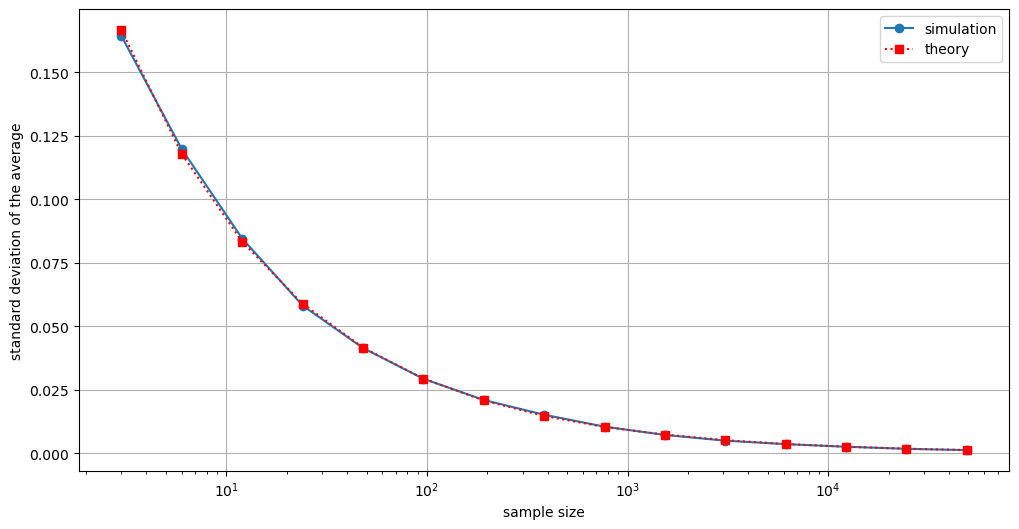

In [56]:
fix, ax = plt.subplots(figsize=(12,6))

ax.plot(sample_size_study, study_sd_vs_samplesize, '-o', label='simulation')
ax.plot(sample_size_study, sem_theory, ':sr', label='theory')

ax.set_xscale('log')
ax.set_xlabel('sample size')
ax.set_ylabel('standard deviation of the average')
ax.grid(True)
ax.legend()

plt.show()

## Using other distributions

We can repeat this exercise by generating random numbers from other distributions.

You msust do that in the homework.

In [57]:
dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_accumulate',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_log',
 '_os',
 '_pi',
 '_random',
 '_repeat',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [58]:
help(random.gauss)

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



In [59]:
random.gauss(mu = 250, sigma = 20)

228.2934387071578

In [60]:
random.gauss(mu = 250, sigma = 2)

250.4944176547876

## Why does this matter?

We collect data and more often than not, we have relatively small sample sizes.

How confident are we on the AVG estimate based on those small sample sizez!!???

For example, how confident are we on the sample size avg estimates using just 5 obs????

In [62]:
random.seed(2100)

yu = [random.random() for _ in range(5)]

In [63]:
sample_avg = my_avg(yu)

print(sample_avg)

0.3938655785843951


We can express our CONFIDENCE using the CLT and the standard error!! 

The CONFIDENCE INTERVAL represents where you anticipate the avg to be!!!

The most common type is the 95% CI which represents theres a 95% chance the avg is somewhat inside the interval!!!

The 95% CI is approximately equal to sample avg +/- 2 times the SEM!!!

$$ 95\% \ \mathrm{confidence} \ \mathrm{interval} = \left( \mathrm{average} - 2 \times \mathrm{SEM}, \mathrm{average} + 2 \times \mathrm{SEM} \right)$$

In [64]:
sample_sd = my_sd(yu)

In [65]:
sem = sample_sd/(len(yu)**.5)

In [66]:
conf_int = (sample_avg - 2*sem, sample_avg + 2*sem)

In [67]:
conf_int

(0.12787049210489415, 0.6598606650638961)

In [68]:
conf_int[1] - conf_int[0]

0.531990172959002

What if we could instead observe 1000 measurements????

In [69]:
random.seed(2100)

# Here we are create a new list of 1000 random numbers
zu = [ random.random() for _ in range(1000)]

In [73]:
# This is the sample avg
sample_avg_zu = my_avg(zu)

In [74]:
# This is the sample sd
sample_sd_zu = my_sd(zu)

In [75]:
# This is the sample sem
sample_sem_zu = sample_sd_zu / (len(zu)**.5)

In [76]:
conf_int_zu = (sample_avg_zu - 2*sample_sem_zu, sample_avg_zu + 2*sample_sem_zu)

In [77]:
conf_int_zu

(0.49403517906158984, 0.5304982488867674)

In [79]:
sample_avg_zu

0.5122667139741787

In [80]:
sample_sd_zu

0.2882658778232974

In [81]:
sample_sem_zu

0.009115767456294407

In [82]:
conf_int_zu[1] - conf_int_zu[0]

0.03646306982517761